## Summary Statistics

Calculate some basic statistics in order to get to know better the dataset

In [4]:
!pip install openpyxl

In [3]:
import pandas as pd
import numpy as np

data = pd.read_excel('../Data/grades.xlsx', header = [0, 1]) # load dataset defining the headers
data.columns = [' '.join(col).strip() for col in data.columns.values]
data.replace('-', np.nan, inplace = True) # wrong values to be numeric
data.replace(-1, np.nan, inplace = True)
data.fillna(0, inplace = True)
data = data.loc[:, (data != 0).any(axis = 0)]

# Display summary statistics
summary = data.describe()
print(data.head(10))
print("Summary of the dadaset:")
print(summary)

   Exams Final  Exams Repeat  Homework Assignments 1  Homework Assignments 2  \
0         10.0           0.0                    10.0                    10.0   
1          9.1           0.0                     9.5                     9.6   
2          9.0           0.0                     9.7                    10.0   
3          8.8           0.0                     9.1                     8.9   
4          8.8           0.0                     9.9                     9.6   
5          8.5           0.0                     8.5                    10.0   
6          8.5           0.0                     6.3                     9.2   
7          8.4           0.0                     9.7                     9.8   
8          8.2           0.0                     8.8                     9.3   
9          8.1           0.0                     7.8                     8.3   

   Homework Assignments 3  Homework Assignments 4  Compulsory Activities 1  \
0                    10.0                

/tmp/ipykernel_672100/4137112696.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace('-', np.nan, inplace = True) # wrong values to be numeric


## Make some statistic plots

Create some basic plots of the original dataset.

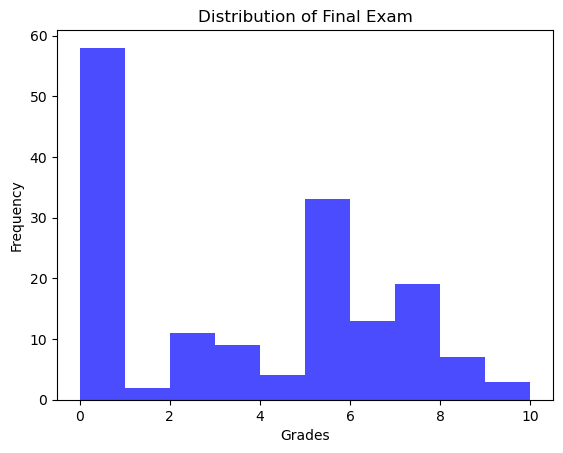

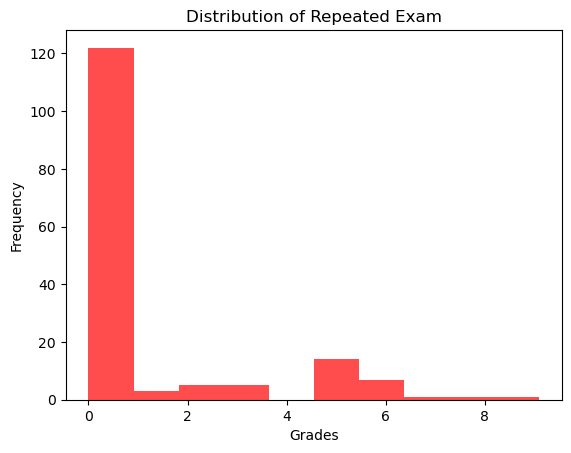

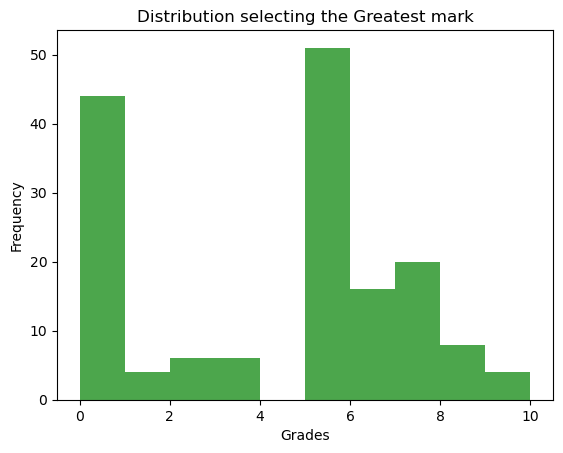

In [8]:
import matplotlib.pyplot as plt

# Histogram of Final grades distribution
plt.hist(data['Exams Final'], bins = 10, color = 'blue', alpha = 0.7)
plt.title('Distribution of Final Exam')
plt.xlabel('Grades')
plt.ylabel('Frequency')
plt.show()

# Histogram of Repeated Exams grades distribution
plt.hist(data['Exams Repeat'], bins = 10, color = 'red', alpha = 0.7)
plt.title('Distribution of Repeated Exam')
plt.xlabel('Grades')
plt.ylabel('Frequency')
plt.show()

# Distribution of Exams keeping the greatest score of the two tries
data['Final Exam'] = data[['Exams Final', 'Exams Repeat']].max(axis = 1)
plt.hist(data['Final Exam'], bins = 10, color = 'green', alpha = 0.7)
plt.title('Distribution selecting the Greatest mark')
plt.xlabel('Grades')
plt.ylabel('Frequency')
plt.show()

data.drop(columns = ['Final Exam'], inplace = True) # drop the new column to keep the original dataset again 

## Make a performance comparison
Performance comparison using the mean values

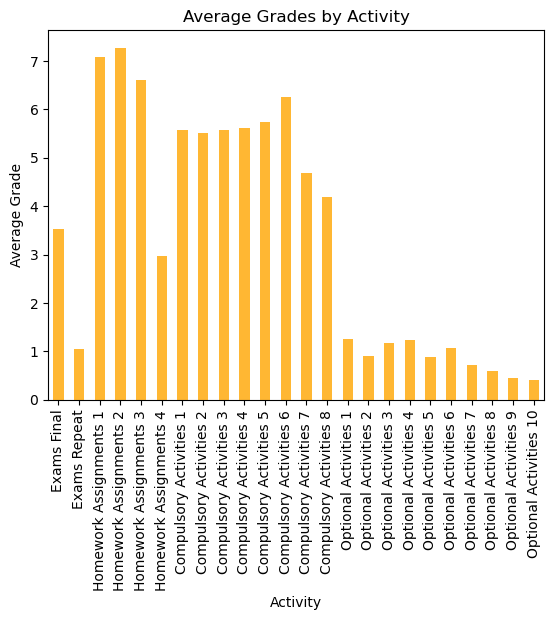

In [9]:
average_grades = data.mean()

average_grades.plot(kind = 'bar', color = 'orange', alpha = 0.8)
plt.title('Average Grades by Activity')
plt.xlabel('Activity')
plt.ylabel('Average Grade')
plt.show()

## Scatter plots
Create some scatterplots to show relationships

In [ ]:
plt.scatter(data['Optional Activities'], data['Final'], alpha=0.6)
plt.title('Optional Activities vs Final Grades')
plt.xlabel('Optional Activities Grades')
plt.ylabel('Final Grades')
plt.show()

